In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import FreqRespPy

from FreqRespPy.data_search import get_target_file_list, open_target_file
#from FreqRespPy.target_calc import mean_freq_response

In [24]:
def to_linear(x):
     return 10**(x / 10.0)    

In [25]:
def to_dB(x):
    return 10 * np.log10(x)

In [27]:
def mean_freq_response(target_df):
    target_df = target_df.apply(pd.to_numeric)
    target_df_lin = to_linear(target_df)
    row_means_lin = target_df_lin.mean(axis=1)
    row_means = to_dB(row_means_lin)
#    print(row_means)
    return row_means

In [4]:
data_directory = 'C:/Users/kevinb/Documents/GitHub/FreqResp/data/'
data_files = get_target_file_list(data_directory)
#print(data_files)

In [5]:
mean_response_output = []

In [7]:
 for file in data_files:

        meta, df = open_target_file(data_directory, file)

#        print(df)
#        print(df.dtypes)

        mean_response = mean_freq_response(df)
        mean_response_output.append(mean_response)

 df_output = pd.concat(mean_response_output, axis=1)
 df_output.to_csv('output/test.csv')

In [17]:
target1= df_output.iloc[:,0]
freq=df.index
#target1
#freq

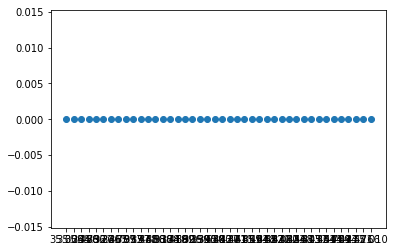

In [19]:
plt.scatter(freq,target1)

In [ ]:
df.head()

In [ ]:
freq=df.index